### Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt  
import numpy as np
from datetime import datetime

### Reading the Dataset

In [2]:
#code to load the dataset
dataset = pd.read_csv("cleaneddata.csv")
df = dataset

In [3]:
#displays first 5 rows of the dataset
dataset.head()

,Date Created,Solar Voltage,Solar Current,Battery Voltage,Inverter Charge Current,Usage Current,Solar Harvest,Battery Charge,Inverter Charge,Usage Charge,Date Extended,Unnamed: 11,Unnamed: 12
0,04/01/2022 12:08,15.050969,0.920469,13.577745,0,-5.889368,15.189676,-∞,2.400000e+17,∞,,NaN,NaN
1,04/01/2022 12:08,15.050969,0.980130,13.586268,0,-6.008690,15.193615,-∞,2.400000e+17,∞,,NaN,NaN
2,04/01/2022 12:08,15.085061,1.005699,13.611837,0,-6.051305,15.197501,-∞,2.400000e+17,∞,,NaN,NaN
3,04/01/2022 12:09,15.264044,1.150590,11.915763,0,-6.281425,15.202242,-∞,2.400000e+17,∞,,NaN,NaN
4,04/01/2022 12:09,15.494164,0.264199,13.969803,0,-6.170627,15.207151,-∞,2.400000e+17,∞,,NaN,NaN


### Cleaning Dataset Before Using It For Modelling

In [4]:
# To get the list of columns and their data types  
df.dtypes

Date Created                 object
 Solar Voltage              float64
 Solar Current              float64
 Battery Voltage            float64
 Inverter Charge Current      int64
 Usage Current              float64
 Solar Harvest              float64
 Battery Charge              object
 Inverter Charge            float64
 Usage Charge                object
 Date Extended               object
Unnamed: 11                 float64
Unnamed: 12                 float64
dtype: object

In [5]:
# Describes the dataset based on statistical indices
df.describe()

,Solar Voltage,Solar Current,Battery Voltage,Inverter Charge Current,Usage Current,Solar Harvest,Inverter Charge,Unnamed: 11,Unnamed: 12
count,702.000000,702.000000,702.000000,702.0,702.000000,702.000000,7.020000e+02,0.0,0.0
mean,13.828819,0.948759,12.331107,0.0,-4.721148,22.225146,6.758632e+17,NaN,NaN
std,0.439597,0.611725,0.454373,0.0,2.099007,22.162818,3.595264e+17,NaN,NaN
min,13.227050,0.085217,10.415717,0.0,-7.542828,3.389207,2.400000e+17,NaN,NaN
25%,13.593538,0.528412,12.094746,0.0,-6.140796,4.063559,2.400000e+17,NaN,NaN
50%,13.661722,0.732964,12.162930,0.0,-5.633678,20.331717,9.720000e+17,NaN,NaN
75%,13.983465,1.404149,12.495326,0.0,-3.426225,29.218991,9.720000e+17,NaN,NaN
max,16.346462,2.573929,14.881763,0.0,-0.801145,69.312950,9.720000e+17,NaN,NaN


In [6]:
#Renaming the Columns to include an underscore instead of space

df.rename(columns={' Battery Voltage':'Battery_Voltage',' Solar Voltage':'Solar_Voltage',' Solar Current':'Solar_Current', 'Date Created':'Date_Created',' Usage Current':'Usage_Current','Unnamed: 11':'Battery_Current','Unnamed: 12':'Solar_Power' ,' Date Extended':'Date_Extended' }, inplace=True)
df.columns

Index(['Date_Created', 'Solar_Voltage', 'Solar_Current', 'Battery_Voltage',
       ' Inverter Charge Current', 'Usage_Current', ' Solar Harvest',
       ' Battery Charge', ' Inverter Charge', ' Usage Charge', 'Date_Extended',
       'Battery_Current', 'Solar_Power'],
      dtype='object')

In [7]:
# Creating new columns for caclulated parameters

df['Battery_Current']=  df['Solar_Current'] + (df['Usage_Current']/2)
df['Solar_Power'] = df['Solar_Voltage'] * df['Solar_Current']
df['load_Power'] = df['Battery_Voltage'] * df['Usage_Current']/2 * -1
df['Battery_Power'] = df['Battery_Voltage'] * df['Battery_Current'] * -1
df['Total_Dc_Power'] = df['Solar_Power'] + df['Battery_Power']
df['Efficiency'] = (df['load_Power']/df['Total_Dc_Power']) * 100

In [8]:
df.head()

,Date_Created,Solar_Voltage,Solar_Current,Battery_Voltage,Inverter Charge Current,Usage_Current,Solar Harvest,Battery Charge,Inverter Charge,Usage Charge,Date_Extended,Battery_Current,Solar_Power,load_Power,Battery_Power,Total_Dc_Power,Efficiency
0,04/01/2022 12:08,15.050969,0.920469,13.577745,0,-5.889368,15.189676,-∞,2.400000e+17,∞,,-2.024215,13.853956,39.982170,27.484272,41.338227,96.719605
1,04/01/2022 12:08,15.050969,0.980130,13.586268,0,-6.008690,15.193615,-∞,2.400000e+17,∞,,-2.024215,14.751910,40.817837,27.501524,42.253434,96.602412
2,04/01/2022 12:08,15.085061,1.005699,13.611837,0,-6.051305,15.197501,-∞,2.400000e+17,∞,,-2.019953,15.171035,41.184689,27.495274,42.666309,96.527424
3,04/01/2022 12:09,15.264044,1.150590,11.915763,0,-6.281425,15.202242,-∞,2.400000e+17,∞,,-1.990123,17.562657,37.423988,23.713830,41.276487,90.666602
4,04/01/2022 12:09,15.494164,0.264199,13.969803,0,-6.170627,15.207151,-∞,2.400000e+17,∞,,-2.821114,4.093548,43.101219,39.410406,43.503954,99.074256


In [9]:
# Converting the Date Created column from an Object data type to DateTime
df['Date_Created'] = pd.to_datetime(df['Date_Created'])
df['Date_Created']
df.head()

,Date_Created,Solar_Voltage,Solar_Current,Battery_Voltage,Inverter Charge Current,Usage_Current,Solar Harvest,Battery Charge,Inverter Charge,Usage Charge,Date_Extended,Battery_Current,Solar_Power,load_Power,Battery_Power,Total_Dc_Power,Efficiency
0,2022-04-01 12:08:00,15.050969,0.920469,13.577745,0,-5.889368,15.189676,-∞,2.400000e+17,∞,,-2.024215,13.853956,39.982170,27.484272,41.338227,96.719605
1,2022-04-01 12:08:00,15.050969,0.980130,13.586268,0,-6.008690,15.193615,-∞,2.400000e+17,∞,,-2.024215,14.751910,40.817837,27.501524,42.253434,96.602412
2,2022-04-01 12:08:00,15.085061,1.005699,13.611837,0,-6.051305,15.197501,-∞,2.400000e+17,∞,,-2.019953,15.171035,41.184689,27.495274,42.666309,96.527424
3,2022-04-01 12:09:00,15.264044,1.150590,11.915763,0,-6.281425,15.202242,-∞,2.400000e+17,∞,,-1.990123,17.562657,37.423988,23.713830,41.276487,90.666602
4,2022-04-01 12:09:00,15.494164,0.264199,13.969803,0,-6.170627,15.207151,-∞,2.400000e+17,∞,,-2.821114,4.093548,43.101219,39.410406,43.503954,99.074256


In [10]:
#Select rows within a specific time in this case between 7:30am and 17:45

df[(df['Date_Created'] > '07:30:00') & (df['Date_Created'] < '17:40:00')]
df.tail()

,Date_Created,Solar_Voltage,Solar_Current,Battery_Voltage,Inverter Charge Current,Usage_Current,Solar Harvest,Battery Charge,Inverter Charge,Usage Charge,Date_Extended,Battery_Current,Solar_Power,load_Power,Battery_Power,Total_Dc_Power,Efficiency
697,2022-04-12 16:46:00,13.908889,0.187492,12.452711,0,-1.031265,69.311394,-12.12796879,9.720000e+17,∞,,-0.328140,2.607812,6.421025,4.086236,6.694047,95.921416
698,2022-04-12 16:46:00,13.908889,0.187492,12.452711,0,-1.031265,69.311394,-12.12796879,9.720000e+17,∞,,-0.328140,2.607812,6.421025,4.086236,6.694047,95.921416
699,2022-04-12 16:46:00,13.917412,0.281245,12.452711,0,-1.022742,69.312218,-12.13144302,9.720000e+17,∞,,-0.230126,3.914207,6.367958,2.865691,6.779898,93.924095
700,2022-04-12 16:47:00,13.917412,0.281245,12.452711,0,-1.022742,69.312218,-12.13144302,9.720000e+17,∞,,-0.230126,3.914207,6.367958,2.865691,6.779898,93.924095
701,2022-04-12 16:47:00,13.917412,0.187492,12.452711,0,-1.022742,69.312950,-12.13470554,9.720000e+17,∞,,-0.323879,2.609410,6.367958,4.033169,6.642578,95.865757


In [11]:
# Change order of columns 

df=df[['Date_Created',' Inverter Charge Current', 'Usage_Current', ' Solar Harvest',' Battery Charge', ' Inverter Charge', ' Usage Charge', 'Date_Extended','Solar_Voltage', 'Solar_Current', 'Battery_Voltage','Battery_Current', 'Total_Dc_Power','Solar_Power','load_Power','Battery_Power', 'Efficiency']]
df.head()

,Date_Created,Inverter Charge Current,Usage_Current,Solar Harvest,Battery Charge,Inverter Charge,Usage Charge,Date_Extended,Solar_Voltage,Solar_Current,Battery_Voltage,Battery_Current,Total_Dc_Power,Solar_Power,load_Power,Battery_Power,Efficiency
0,2022-04-01 12:08:00,0,-5.889368,15.189676,-∞,2.400000e+17,∞,,15.050969,0.920469,13.577745,-2.024215,41.338227,13.853956,39.982170,27.484272,96.719605
1,2022-04-01 12:08:00,0,-6.008690,15.193615,-∞,2.400000e+17,∞,,15.050969,0.980130,13.586268,-2.024215,42.253434,14.751910,40.817837,27.501524,96.602412
2,2022-04-01 12:08:00,0,-6.051305,15.197501,-∞,2.400000e+17,∞,,15.085061,1.005699,13.611837,-2.019953,42.666309,15.171035,41.184689,27.495274,96.527424
3,2022-04-01 12:09:00,0,-6.281425,15.202242,-∞,2.400000e+17,∞,,15.264044,1.150590,11.915763,-1.990123,41.276487,17.562657,37.423988,23.713830,90.666602
4,2022-04-01 12:09:00,0,-6.170627,15.207151,-∞,2.400000e+17,∞,,15.494164,0.264199,13.969803,-2.821114,43.503954,4.093548,43.101219,39.410406,99.074256


In [12]:
# trim the dataset to contain only the parameters that are going in the input layer of the model
model_data = df.iloc[:,13:17]
# exports the content of train to a csv file
model_data.to_csv(r'modeldata.csv', index=False)
model_data

,Solar_Power,load_Power,Battery_Power,Efficiency
0,13.853956,39.982170,27.484272,96.719605
1,14.751910,40.817837,27.501524,96.602412
2,15.171035,41.184689,27.495274,96.527424
3,17.562657,37.423988,23.713830,90.666602
4,4.093548,43.101219,39.410406,99.074256
...,...,...,...,...
697,2.607812,6.421025,4.086236,95.921416
698,2.607812,6.421025,4.086236,95.921416
699,3.914207,6.367958,2.865691,93.924095
700,3.914207,6.367958,2.865691,93.924095


### Creating The Network

In [13]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf

In [14]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [44]:
input_data = Input(shape=(3), name='Input')
dense1 = Dense(256, activation=tf.nn.relu)(input_data)
dense2 = Dense(256, activation=tf.nn.relu)(dense1)
output = Dense(1, name='output')(dense2)

model = Model(input_data, output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae', 'mse'] )
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 3)]               0         
                                                                 
 dense_2 (Dense)             (None, 256)               1024      
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 output (Dense)              (None, 1)                 257       
                                                                 
Total params: 67,073
Trainable params: 67,073
Non-trainable params: 0
_________________________________________________________________


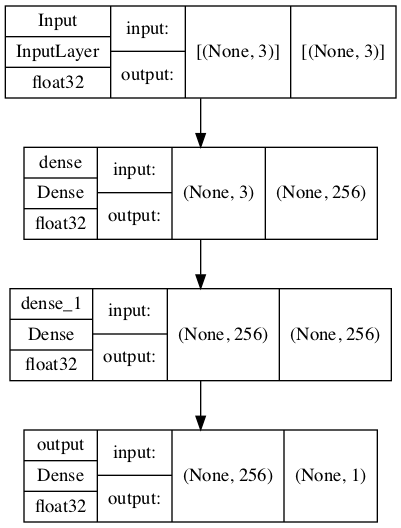

In [16]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

### Data Normalization

In [17]:
def separate(df):
    return df[['Efficiency']].to_numpy(), df.drop(df[['Efficiency']], axis=1).to_numpy()

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()
df_normed = pd.DataFrame(min_max_scaler.fit_transform(model_data))
df_normed.columns = list(model_data.columns)
train_set, test_set = train_test_split(model_data)
train_labels, train_features = separate(train_set)
test_labels, test_features = separate(test_set)

### Fitting/Training the Network

In [19]:
history = model.fit(
    train_features,
    train_labels,
    epochs=1000,
    validation_data=(test_features,
                     test_labels)
)

Epoch 1/1000
17/17 [==============================] - 1s 16ms/step - loss: 5021.2676 - mae: 66.9273 - mse: 5021.2676 - mape: 70.4709 - val_loss: 1515.6548 - val_mae: 28.9159 - val_mse: 1515.6548 - val_mape: 30.7726
Epoch 2/1000
17/17 [==============================] - 0s 5ms/step - loss: 1631.5547 - mae: 32.4948 - mse: 1631.5547 - mape: 34.3605 - val_loss: 1266.1489 - val_mae: 26.2523 - val_mse: 1266.1489 - val_mape: 27.8247
Epoch 3/1000
17/17 [==============================] - 0s 4ms/step - loss: 1460.4377 - mae: 26.6771 - mse: 1460.4377 - mape: 28.2873 - val_loss: 1222.9720 - val_mae: 23.5463 - val_mse: 1222.9720 - val_mape: 25.0211
Epoch 4/1000
17/17 [==============================] - 0s 9ms/step - loss: 1402.2156 - mae: 26.5187 - mse: 1402.2156 - mape: 28.1298 - val_loss: 1175.6837 - val_mae: 23.0668 - val_mse: 1175.6837 - val_mape: 24.5029
Epoch 5/1000
17/17 [==============================] - 0s 7ms/step - loss: 1376.1323 - mae: 26.0381 - mse: 1376.1323 - mape: 27.6181 - val_loss:

17/17 [==============================] - 0s 4ms/step - loss: 2.2812 - mae: 1.0582 - mse: 2.2812 - mape: 1.1137 - val_loss: 3.3548 - val_mae: 1.2149 - val_mse: 3.3548 - val_mape: 1.2951
Epoch 41/1000
17/17 [==============================] - 0s 5ms/step - loss: 2.6677 - mae: 1.1957 - mse: 2.6677 - mape: 1.2599 - val_loss: 2.8615 - val_mae: 0.9815 - val_mse: 2.8615 - val_mape: 1.0489
Epoch 42/1000
17/17 [==============================] - 0s 6ms/step - loss: 2.0086 - mae: 0.9660 - mse: 2.0086 - mape: 1.0180 - val_loss: 3.2966 - val_mae: 1.1895 - val_mse: 3.2966 - val_mape: 1.2674
Epoch 43/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.0014 - mae: 0.9916 - mse: 2.0014 - mape: 1.0445 - val_loss: 2.5909 - val_mae: 0.9066 - val_mse: 2.5909 - val_mape: 0.9721
Epoch 44/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.6892 - mae: 0.8250 - mse: 1.6892 - mape: 0.8698 - val_loss: 2.6760 - val_mae: 0.9395 - val_mse: 2.6760 - val_mape: 1.0079
Epoch 45/1000
17/17

17/17 [==============================] - 0s 4ms/step - loss: 1.0314 - mae: 0.6358 - mse: 1.0314 - mape: 0.6697 - val_loss: 1.7206 - val_mae: 0.6136 - val_mse: 1.7206 - val_mape: 0.6579
Epoch 82/1000
17/17 [==============================] - 0s 5ms/step - loss: 3.0840 - mae: 1.3309 - mse: 3.0840 - mape: 1.3997 - val_loss: 2.9104 - val_mae: 1.2318 - val_mse: 2.9104 - val_mape: 1.3014
Epoch 83/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.3901 - mae: 0.7794 - mse: 1.3901 - mape: 0.8201 - val_loss: 1.7785 - val_mae: 0.7190 - val_mse: 1.7785 - val_mape: 0.7736
Epoch 84/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.0917 - mae: 0.6821 - mse: 1.0917 - mape: 0.7183 - val_loss: 1.7470 - val_mae: 0.6780 - val_mse: 1.7470 - val_mape: 0.7274
Epoch 85/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.1251 - mae: 0.7366 - mse: 1.1251 - mape: 0.7750 - val_loss: 1.9651 - val_mae: 0.8107 - val_mse: 1.9651 - val_mape: 0.8665
Epoch 86/1000
17/17

17/17 [==============================] - 0s 10ms/step - loss: 0.7443 - mae: 0.5448 - mse: 0.7443 - mape: 0.5749 - val_loss: 1.2354 - val_mae: 0.3862 - val_mse: 1.2354 - val_mape: 0.4209
Epoch 123/1000
17/17 [==============================] - 0s 10ms/step - loss: 0.6082 - mae: 0.4786 - mse: 0.6082 - mape: 0.5044 - val_loss: 1.4183 - val_mae: 0.5683 - val_mse: 1.4183 - val_mape: 0.6111
Epoch 124/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.2127 - mae: 0.7897 - mse: 1.2127 - mape: 0.8314 - val_loss: 2.4550 - val_mae: 1.1335 - val_mse: 2.4550 - val_mape: 1.1986
Epoch 125/1000
17/17 [==============================] - 0s 8ms/step - loss: 1.5884 - mae: 0.9809 - mse: 1.5884 - mape: 1.0313 - val_loss: 1.9867 - val_mae: 0.9228 - val_mse: 1.9867 - val_mape: 0.9820
Epoch 126/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.2668 - mae: 0.8544 - mse: 1.2668 - mape: 0.8988 - val_loss: 1.7704 - val_mae: 0.8531 - val_mse: 1.7704 - val_mape: 0.9071
Epoch 127/100

17/17 [==============================] - 0s 4ms/step - loss: 0.4535 - mae: 0.4092 - mse: 0.4535 - mape: 0.4324 - val_loss: 1.1129 - val_mae: 0.3866 - val_mse: 1.1129 - val_mape: 0.4199
Epoch 164/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.4632 - mae: 0.3811 - mse: 0.4632 - mape: 0.4028 - val_loss: 1.0974 - val_mae: 0.3708 - val_mse: 1.0974 - val_mape: 0.4046
Epoch 165/1000
17/17 [==============================] - 0s 9ms/step - loss: 0.4507 - mae: 0.3722 - mse: 0.4507 - mape: 0.3934 - val_loss: 1.4919 - val_mae: 0.7064 - val_mse: 1.4919 - val_mape: 0.7531
Epoch 166/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.4373 - mae: 0.3762 - mse: 0.4373 - mape: 0.3979 - val_loss: 1.0977 - val_mae: 0.3404 - val_mse: 1.0977 - val_mape: 0.3733
Epoch 167/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.5500 - mae: 0.4764 - mse: 0.5500 - mape: 0.5029 - val_loss: 1.0957 - val_mae: 0.3849 - val_mse: 1.0957 - val_mape: 0.4195
Epoch 168/1000


17/17 [==============================] - 0s 4ms/step - loss: 0.3176 - mae: 0.2866 - mse: 0.3176 - mape: 0.3037 - val_loss: 0.9694 - val_mae: 0.2975 - val_mse: 0.9694 - val_mape: 0.3271
Epoch 205/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.4402 - mae: 0.3989 - mse: 0.4402 - mape: 0.4214 - val_loss: 1.1776 - val_mae: 0.5611 - val_mse: 1.1776 - val_mape: 0.5994
Epoch 206/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.7026 - mae: 0.5892 - mse: 0.7026 - mape: 0.6209 - val_loss: 2.5023 - val_mae: 1.1833 - val_mse: 2.5023 - val_mape: 1.2457
Epoch 207/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.7852 - mae: 0.6786 - mse: 0.7852 - mape: 0.7136 - val_loss: 1.3214 - val_mae: 0.7241 - val_mse: 1.3214 - val_mape: 0.7771
Epoch 208/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.4552 - mae: 0.4318 - mse: 0.4552 - mape: 0.4562 - val_loss: 1.5076 - val_mae: 0.8138 - val_mse: 1.5076 - val_mape: 0.8650
Epoch 209/1000


17/17 [==============================] - 0s 5ms/step - loss: 0.3855 - mae: 0.4049 - mse: 0.3855 - mape: 0.4269 - val_loss: 0.9052 - val_mae: 0.3169 - val_mse: 0.9052 - val_mape: 0.3468
Epoch 246/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.4317 - mae: 0.4465 - mse: 0.4317 - mape: 0.4706 - val_loss: 1.0145 - val_mae: 0.4575 - val_mse: 1.0145 - val_mape: 0.4986
Epoch 247/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.5670 - mae: 0.5119 - mse: 0.5670 - mape: 0.5395 - val_loss: 1.3929 - val_mae: 0.7543 - val_mse: 1.3929 - val_mape: 0.7998
Epoch 248/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.3584 - mae: 0.3767 - mse: 0.3584 - mape: 0.3974 - val_loss: 0.8857 - val_mae: 0.3260 - val_mse: 0.8857 - val_mape: 0.3557
Epoch 249/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.3462 - mae: 0.3621 - mse: 0.3462 - mape: 0.3828 - val_loss: 0.8771 - val_mae: 0.2814 - val_mse: 0.8771 - val_mape: 0.3099
Epoch 250/1000


17/17 [==============================] - 0s 4ms/step - loss: 0.2416 - mae: 0.3000 - mse: 0.2416 - mape: 0.3176 - val_loss: 0.8761 - val_mae: 0.3103 - val_mse: 0.8761 - val_mape: 0.3414
Epoch 287/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.2161 - mae: 0.2566 - mse: 0.2161 - mape: 0.2722 - val_loss: 0.8511 - val_mae: 0.4396 - val_mse: 0.8511 - val_mape: 0.4746
Epoch 288/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.2228 - mae: 0.2593 - mse: 0.2228 - mape: 0.2750 - val_loss: 0.9640 - val_mae: 0.5310 - val_mse: 0.9640 - val_mape: 0.5691
Epoch 289/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1903 - mae: 0.2166 - mse: 0.1903 - mape: 0.2298 - val_loss: 0.8221 - val_mae: 0.3532 - val_mse: 0.8221 - val_mape: 0.3832
Epoch 290/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.2783 - mae: 0.3604 - mse: 0.2783 - mape: 0.3805 - val_loss: 1.0250 - val_mae: 0.5466 - val_mse: 1.0250 - val_mape: 0.5821
Epoch 291/1000


17/17 [==============================] - 0s 4ms/step - loss: 0.1528 - mae: 0.1846 - mse: 0.1528 - mape: 0.1959 - val_loss: 0.6999 - val_mae: 0.2324 - val_mse: 0.6999 - val_mape: 0.2578
Epoch 328/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.4091 - mae: 0.4707 - mse: 0.4091 - mape: 0.4960 - val_loss: 0.9374 - val_mae: 0.5245 - val_mse: 0.9374 - val_mape: 0.5602
Epoch 329/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9138 - mae: 0.7479 - mse: 0.9138 - mape: 0.7856 - val_loss: 1.2337 - val_mae: 0.7314 - val_mse: 1.2337 - val_mape: 0.7738
Epoch 330/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.5957 - mae: 0.5957 - mse: 0.5957 - mape: 0.6265 - val_loss: 0.9568 - val_mae: 0.5741 - val_mse: 0.9568 - val_mape: 0.6204
Epoch 331/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.4242 - mae: 0.4635 - mse: 0.4242 - mape: 0.4889 - val_loss: 1.1733 - val_mae: 0.6847 - val_mse: 1.1733 - val_mape: 0.7253
Epoch 332/1000


17/17 [==============================] - 0s 6ms/step - loss: 0.1694 - mae: 0.2380 - mse: 0.1694 - mape: 0.2514 - val_loss: 0.6620 - val_mae: 0.2390 - val_mse: 0.6620 - val_mape: 0.2642
Epoch 369/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1987 - mae: 0.2836 - mse: 0.1987 - mape: 0.2997 - val_loss: 0.6953 - val_mae: 0.2685 - val_mse: 0.6953 - val_mape: 0.2944
Epoch 370/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1520 - mae: 0.2202 - mse: 0.1520 - mape: 0.2333 - val_loss: 0.8457 - val_mae: 0.4977 - val_mse: 0.8457 - val_mape: 0.5349
Epoch 371/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1786 - mae: 0.2670 - mse: 0.1786 - mape: 0.2822 - val_loss: 0.6603 - val_mae: 0.2069 - val_mse: 0.6603 - val_mape: 0.2299
Epoch 372/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1915 - mae: 0.2645 - mse: 0.1915 - mape: 0.2795 - val_loss: 0.8073 - val_mae: 0.5214 - val_mse: 0.8073 - val_mape: 0.5590
Epoch 373/1000


17/17 [==============================] - 0s 8ms/step - loss: 1.4522 - mae: 0.9516 - mse: 1.4522 - mape: 1.0002 - val_loss: 2.7511 - val_mae: 1.2462 - val_mse: 2.7511 - val_mape: 1.3428
Epoch 410/1000
17/17 [==============================] - 0s 8ms/step - loss: 1.8369 - mae: 0.9967 - mse: 1.8369 - mape: 1.0477 - val_loss: 0.7859 - val_mae: 0.4155 - val_mse: 0.7859 - val_mape: 0.4503
Epoch 411/1000
17/17 [==============================] - 0s 9ms/step - loss: 0.1560 - mae: 0.2210 - mse: 0.1560 - mape: 0.2340 - val_loss: 0.7158 - val_mae: 0.3913 - val_mse: 0.7158 - val_mape: 0.4209
Epoch 412/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.1688 - mae: 0.2436 - mse: 0.1688 - mape: 0.2576 - val_loss: 0.6462 - val_mae: 0.2169 - val_mse: 0.6462 - val_mape: 0.2402
Epoch 413/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.1368 - mae: 0.1942 - mse: 0.1368 - mape: 0.2058 - val_loss: 0.6321 - val_mae: 0.2320 - val_mse: 0.6321 - val_mape: 0.2550
Epoch 414/1000


17/17 [==============================] - 0s 6ms/step - loss: 0.9635 - mae: 0.7789 - mse: 0.9635 - mape: 0.8195 - val_loss: 0.7230 - val_mae: 0.3953 - val_mse: 0.7230 - val_mape: 0.4252
Epoch 451/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.2862 - mae: 0.3806 - mse: 0.2862 - mape: 0.4017 - val_loss: 0.6969 - val_mae: 0.4007 - val_mse: 0.6969 - val_mape: 0.4321
Epoch 452/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.1328 - mae: 0.1950 - mse: 0.1328 - mape: 0.2064 - val_loss: 0.6000 - val_mae: 0.2823 - val_mse: 0.6000 - val_mape: 0.3065
Epoch 453/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.1258 - mae: 0.1916 - mse: 0.1258 - mape: 0.2029 - val_loss: 0.6434 - val_mae: 0.2688 - val_mse: 0.6434 - val_mape: 0.2958
Epoch 454/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.4931 - mae: 0.4808 - mse: 0.4931 - mape: 0.5059 - val_loss: 0.6828 - val_mae: 0.3722 - val_mse: 0.6828 - val_mape: 0.4055
Epoch 455/1000


17/17 [==============================] - 0s 5ms/step - loss: 0.1183 - mae: 0.1959 - mse: 0.1183 - mape: 0.2075 - val_loss: 0.6182 - val_mae: 0.2801 - val_mse: 0.6182 - val_mape: 0.3062
Epoch 492/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1190 - mae: 0.1802 - mse: 0.1190 - mape: 0.1909 - val_loss: 0.5378 - val_mae: 0.1731 - val_mse: 0.5378 - val_mape: 0.1925
Epoch 493/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1073 - mae: 0.1593 - mse: 0.1073 - mape: 0.1691 - val_loss: 0.5438 - val_mae: 0.2653 - val_mse: 0.5438 - val_mape: 0.2914
Epoch 494/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1304 - mae: 0.2187 - mse: 0.1304 - mape: 0.2314 - val_loss: 0.6557 - val_mae: 0.3172 - val_mse: 0.6557 - val_mape: 0.3463
Epoch 495/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1566 - mae: 0.2417 - mse: 0.1566 - mape: 0.2553 - val_loss: 0.5384 - val_mae: 0.1943 - val_mse: 0.5384 - val_mape: 0.2150
Epoch 496/1000


17/17 [==============================] - 0s 4ms/step - loss: 0.7304 - mae: 0.6914 - mse: 0.7304 - mape: 0.7261 - val_loss: 1.2788 - val_mae: 0.8740 - val_mse: 1.2788 - val_mape: 0.9231
Epoch 533/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.5160 - mae: 0.5473 - mse: 0.5160 - mape: 0.5756 - val_loss: 0.7142 - val_mae: 0.3575 - val_mse: 0.7142 - val_mape: 0.3927
Epoch 534/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.7695 - mae: 0.6506 - mse: 0.7695 - mape: 0.6831 - val_loss: 1.5247 - val_mae: 0.8676 - val_mse: 1.5247 - val_mape: 0.9094
Epoch 535/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.6962 - mae: 1.4982 - mse: 3.6962 - mape: 1.5745 - val_loss: 1.9031 - val_mae: 0.9070 - val_mse: 1.9031 - val_mape: 0.9471
Epoch 536/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.8935 - mae: 1.3260 - mse: 2.8935 - mape: 1.3922 - val_loss: 0.8812 - val_mae: 0.5362 - val_mse: 0.8812 - val_mape: 0.5710
Epoch 537/1000


17/17 [==============================] - 0s 4ms/step - loss: 0.2115 - mae: 0.3158 - mse: 0.2115 - mape: 0.3333 - val_loss: 0.9395 - val_mae: 0.6839 - val_mse: 0.9395 - val_mape: 0.7276
Epoch 574/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.2666 - mae: 0.3778 - mse: 0.2666 - mape: 0.3981 - val_loss: 0.5077 - val_mae: 0.2251 - val_mse: 0.5077 - val_mape: 0.2455
Epoch 575/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0898 - mae: 0.1347 - mse: 0.0898 - mape: 0.1431 - val_loss: 0.4757 - val_mae: 0.2147 - val_mse: 0.4757 - val_mape: 0.2349
Epoch 576/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1125 - mae: 0.1790 - mse: 0.1125 - mape: 0.1893 - val_loss: 0.4862 - val_mae: 0.2243 - val_mse: 0.4862 - val_mape: 0.2458
Epoch 577/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1707 - mae: 0.2655 - mse: 0.1707 - mape: 0.2801 - val_loss: 0.4959 - val_mae: 0.2072 - val_mse: 0.4959 - val_mape: 0.2282
Epoch 578/1000


17/17 [==============================] - 0s 4ms/step - loss: 0.4517 - mae: 0.5364 - mse: 0.4517 - mape: 0.5633 - val_loss: 0.5046 - val_mae: 0.2231 - val_mse: 0.5046 - val_mape: 0.2450
Epoch 615/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1563 - mae: 0.2636 - mse: 0.1563 - mape: 0.2780 - val_loss: 0.6431 - val_mae: 0.4468 - val_mse: 0.6431 - val_mape: 0.4800
Epoch 616/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1373 - mae: 0.2192 - mse: 0.1373 - mape: 0.2317 - val_loss: 0.4605 - val_mae: 0.2338 - val_mse: 0.4605 - val_mape: 0.2551
Epoch 617/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1921 - mae: 0.2992 - mse: 0.1921 - mape: 0.3158 - val_loss: 0.6401 - val_mae: 0.4333 - val_mse: 0.6401 - val_mape: 0.4672
Epoch 618/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8444 - mae: 0.7164 - mse: 0.8444 - mape: 0.7534 - val_loss: 3.2980 - val_mae: 1.5765 - val_mse: 3.2980 - val_mape: 1.6813
Epoch 619/1000


17/17 [==============================] - 0s 5ms/step - loss: 0.1377 - mae: 0.2445 - mse: 0.1377 - mape: 0.2577 - val_loss: 0.5956 - val_mae: 0.4693 - val_mse: 0.5956 - val_mape: 0.5013
Epoch 656/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.3135 - mae: 0.4130 - mse: 0.3135 - mape: 0.4347 - val_loss: 0.9329 - val_mae: 0.7690 - val_mse: 0.9329 - val_mape: 0.8178
Epoch 657/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.7727 - mae: 1.0699 - mse: 1.7727 - mape: 1.1237 - val_loss: 7.7704 - val_mae: 2.4729 - val_mse: 7.7704 - val_mape: 2.5910
Epoch 658/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.2060 - mae: 1.1912 - mse: 2.2060 - mape: 1.2480 - val_loss: 0.9054 - val_mae: 0.6568 - val_mse: 0.9054 - val_mape: 0.6980
Epoch 659/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.2965 - mae: 0.3905 - mse: 0.2965 - mape: 0.4112 - val_loss: 0.4688 - val_mae: 0.1745 - val_mse: 0.4688 - val_mape: 0.1931
Epoch 660/1000


17/17 [==============================] - 0s 4ms/step - loss: 0.1759 - mae: 0.2918 - mse: 0.1759 - mape: 0.3074 - val_loss: 0.6055 - val_mae: 0.4354 - val_mse: 0.6055 - val_mape: 0.4663
Epoch 697/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1319 - mae: 0.2243 - mse: 0.1319 - mape: 0.2368 - val_loss: 0.5064 - val_mae: 0.3217 - val_mse: 0.5064 - val_mape: 0.3446
Epoch 698/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1326 - mae: 0.2193 - mse: 0.1326 - mape: 0.2315 - val_loss: 0.4435 - val_mae: 0.2344 - val_mse: 0.4435 - val_mape: 0.2535
Epoch 699/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0928 - mae: 0.1472 - mse: 0.0928 - mape: 0.1562 - val_loss: 0.4615 - val_mae: 0.3253 - val_mse: 0.4615 - val_mape: 0.3516
Epoch 700/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.2069 - mae: 0.3341 - mse: 0.2069 - mape: 0.3520 - val_loss: 0.7634 - val_mae: 0.5883 - val_mse: 0.7634 - val_mape: 0.6274
Epoch 701/1000


17/17 [==============================] - 0s 4ms/step - loss: 0.0802 - mae: 0.1253 - mse: 0.0802 - mape: 0.1327 - val_loss: 0.4556 - val_mae: 0.2735 - val_mse: 0.4556 - val_mape: 0.2958
Epoch 738/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0988 - mae: 0.1749 - mse: 0.0988 - mape: 0.1849 - val_loss: 0.4444 - val_mae: 0.2292 - val_mse: 0.4444 - val_mape: 0.2489
Epoch 739/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1089 - mae: 0.2009 - mse: 0.1089 - mape: 0.2123 - val_loss: 0.4537 - val_mae: 0.2371 - val_mse: 0.4537 - val_mape: 0.2597
Epoch 740/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0838 - mae: 0.1380 - mse: 0.0838 - mape: 0.1464 - val_loss: 0.4373 - val_mae: 0.1925 - val_mse: 0.4373 - val_mape: 0.2108
Epoch 741/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0984 - mae: 0.1701 - mse: 0.0984 - mape: 0.1799 - val_loss: 0.4820 - val_mae: 0.2855 - val_mse: 0.4820 - val_mape: 0.3107
Epoch 742/1000


17/17 [==============================] - 0s 5ms/step - loss: 0.2692 - mae: 0.3833 - mse: 0.2692 - mape: 0.4038 - val_loss: 0.4719 - val_mae: 0.2418 - val_mse: 0.4719 - val_mape: 0.2649
Epoch 779/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1544 - mae: 0.2551 - mse: 0.1544 - mape: 0.2688 - val_loss: 0.5770 - val_mae: 0.4041 - val_mse: 0.5770 - val_mape: 0.4385
Epoch 780/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.3047 - mae: 0.4220 - mse: 0.3047 - mape: 0.4442 - val_loss: 0.4446 - val_mae: 0.2568 - val_mse: 0.4446 - val_mape: 0.2781
Epoch 781/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1312 - mae: 0.2437 - mse: 0.1312 - mape: 0.2571 - val_loss: 0.4100 - val_mae: 0.2355 - val_mse: 0.4100 - val_mape: 0.2578
Epoch 782/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1729 - mae: 0.2936 - mse: 0.1729 - mape: 0.3095 - val_loss: 0.5749 - val_mae: 0.4522 - val_mse: 0.5749 - val_mape: 0.4843
Epoch 783/1000


17/17 [==============================] - 0s 7ms/step - loss: 0.1107 - mae: 0.2040 - mse: 0.1107 - mape: 0.2150 - val_loss: 0.3778 - val_mae: 0.2064 - val_mse: 0.3778 - val_mape: 0.2263
Epoch 820/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.0982 - mae: 0.1964 - mse: 0.0982 - mape: 0.2069 - val_loss: 0.6280 - val_mae: 0.5144 - val_mse: 0.6280 - val_mape: 0.5491
Epoch 821/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.1513 - mae: 0.2558 - mse: 0.1513 - mape: 0.2701 - val_loss: 0.3960 - val_mae: 0.2059 - val_mse: 0.3960 - val_mape: 0.2240
Epoch 822/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.1503 - mae: 0.2475 - mse: 0.1503 - mape: 0.2608 - val_loss: 0.7994 - val_mae: 0.6590 - val_mse: 0.7994 - val_mape: 0.7007
Epoch 823/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.1879 - mae: 0.3025 - mse: 0.1879 - mape: 0.3181 - val_loss: 0.5029 - val_mae: 0.3659 - val_mse: 0.5029 - val_mape: 0.3931
Epoch 824/1000


17/17 [==============================] - 0s 4ms/step - loss: 0.0862 - mae: 0.1734 - mse: 0.0862 - mape: 0.1835 - val_loss: 0.4062 - val_mae: 0.2330 - val_mse: 0.4062 - val_mape: 0.2548
Epoch 861/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0851 - mae: 0.1611 - mse: 0.0851 - mape: 0.1706 - val_loss: 0.3953 - val_mae: 0.1933 - val_mse: 0.3953 - val_mape: 0.2117
Epoch 862/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0600 - mae: 0.1003 - mse: 0.0600 - mape: 0.1069 - val_loss: 0.3560 - val_mae: 0.1815 - val_mse: 0.3560 - val_mape: 0.1993
Epoch 863/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0707 - mae: 0.1394 - mse: 0.0707 - mape: 0.1478 - val_loss: 0.3971 - val_mae: 0.1644 - val_mse: 0.3971 - val_mape: 0.1831
Epoch 864/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0611 - mae: 0.0866 - mse: 0.0611 - mape: 0.0926 - val_loss: 0.3797 - val_mae: 0.1603 - val_mse: 0.3797 - val_mape: 0.1770
Epoch 865/1000


17/17 [==============================] - 0s 4ms/step - loss: 0.8172 - mae: 0.7163 - mse: 0.8172 - mape: 0.7528 - val_loss: 1.9674 - val_mae: 1.3056 - val_mse: 1.9674 - val_mape: 1.3851
Epoch 902/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.5271 - mae: 0.5873 - mse: 0.5271 - mape: 0.6167 - val_loss: 0.4983 - val_mae: 0.4319 - val_mse: 0.4983 - val_mape: 0.4605
Epoch 903/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0981 - mae: 0.1782 - mse: 0.0981 - mape: 0.1888 - val_loss: 0.3545 - val_mae: 0.2014 - val_mse: 0.3545 - val_mape: 0.2195
Epoch 904/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0749 - mae: 0.1538 - mse: 0.0749 - mape: 0.1633 - val_loss: 0.4179 - val_mae: 0.2174 - val_mse: 0.4179 - val_mape: 0.2381
Epoch 905/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0652 - mae: 0.1300 - mse: 0.0652 - mape: 0.1379 - val_loss: 0.3414 - val_mae: 0.1997 - val_mse: 0.3414 - val_mape: 0.2182
Epoch 906/1000


17/17 [==============================] - 0s 4ms/step - loss: 0.1079 - mae: 0.2250 - mse: 0.1079 - mape: 0.2374 - val_loss: 0.4109 - val_mae: 0.3111 - val_mse: 0.4109 - val_mape: 0.3339
Epoch 943/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.1566 - mae: 0.2903 - mse: 0.1566 - mape: 0.3050 - val_loss: 0.3754 - val_mae: 0.2985 - val_mse: 0.3754 - val_mape: 0.3210
Epoch 944/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0668 - mae: 0.1340 - mse: 0.0668 - mape: 0.1421 - val_loss: 0.5299 - val_mae: 0.5115 - val_mse: 0.5299 - val_mape: 0.5447
Epoch 945/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1714 - mae: 0.3218 - mse: 0.1714 - mape: 0.3389 - val_loss: 0.4595 - val_mae: 0.3621 - val_mse: 0.4595 - val_mape: 0.3888
Epoch 946/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0822 - mae: 0.1758 - mse: 0.0822 - mape: 0.1858 - val_loss: 0.3327 - val_mae: 0.1160 - val_mse: 0.3327 - val_mape: 0.1305
Epoch 947/1000


17/17 [==============================] - 0s 4ms/step - loss: 0.1180 - mae: 0.2312 - mse: 0.1180 - mape: 0.2442 - val_loss: 0.4330 - val_mae: 0.3190 - val_mse: 0.4330 - val_mape: 0.3407
Epoch 984/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1599 - mae: 0.2863 - mse: 0.1599 - mape: 0.3018 - val_loss: 0.4023 - val_mae: 0.3170 - val_mse: 0.4023 - val_mape: 0.3412
Epoch 985/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1217 - mae: 0.2337 - mse: 0.1217 - mape: 0.2460 - val_loss: 0.3584 - val_mae: 0.2752 - val_mse: 0.3584 - val_mape: 0.2946
Epoch 986/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0660 - mae: 0.1386 - mse: 0.0660 - mape: 0.1467 - val_loss: 0.3514 - val_mae: 0.2099 - val_mse: 0.3514 - val_mape: 0.2282
Epoch 987/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0585 - mae: 0.1170 - mse: 0.0585 - mape: 0.1240 - val_loss: 0.3277 - val_mae: 0.1407 - val_mse: 0.3277 - val_mape: 0.1556
Epoch 988/1000


### Model Performance Evaluation

In [20]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import average_precision_score
from scipy.stats import pearsonr
for i in range(np.shape(train_labels)[1]): 
  metrics= {
      'mae-train': np.mean(np.abs(train_labels[:, i] - model.predict(train_features)[:, i])),
      'mse-train': np.mean(np.square(train_labels[:, i] - model.predict(train_features)[:, i])),
      'r2-train': r2_score(train_labels[:, i], model.predict(train_features)[:, i]),
      'pearson-train': pearsonr(train_labels[:, i], model.predict(train_features)[:, i])[0],
      'mae-test': np.mean(np.abs(test_labels[:, i] - model.predict(test_features)[:, i])),
      'mse-test': np.mean(np.square(test_labels[:, i] - model.predict(test_features)[:, i])),
      'r2-test': r2_score(test_labels[:, i] ,model.predict(test_features)[:, i]),
      'pearson-test': pearsonr(test_labels[:, i], model.predict(test_features)[:, i])[0]
  }

  blue = lambda x: '\033[94m' + x + '\033[0m'
  yellow = lambda x: '\033[93m' + x + '\033[0m'

  for key in metrics:
      if 'train' in key:
          print(f'Y{i} - {blue(key)} - {str(metrics[key])[:7]}')
      else:
          print(f'Y{i} - {yellow(key)} - {str(metrics[key])[:7]}')
            

Y0 - mae-train - 0.13812
Y0 - mse-train - 0.05944
Y0 - r2-train - 0.98836
Y0 - pearson-train - 0.99494
Y0 - mae-test - 0.18974
Y0 - mse-test - 0.32430
Y0 - r2-test - 0.95242
Y0 - pearson-test - 0.97810


In [21]:
from prettytable import PrettyTable
metrics_table =  PrettyTable(["MSE", "MAE", "pearson", "r2"])
metrics_table.add_row(["0.09718", "0.03199", "0.99399", "0.99731"])
metrics_table.add_row(["0.11152", "0.05918", "0.99044", "0.99602"])
print(metrics_table )

+---------+---------+---------+---------+
|   MSE   |   MAE   | pearson |    r2   |
+---------+---------+---------+---------+
| 0.09718 | 0.03199 | 0.99399 | 0.99731 |
| 0.11152 | 0.05918 | 0.99044 | 0.99602 |
+---------+---------+---------+---------+


### Data Visualisation

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

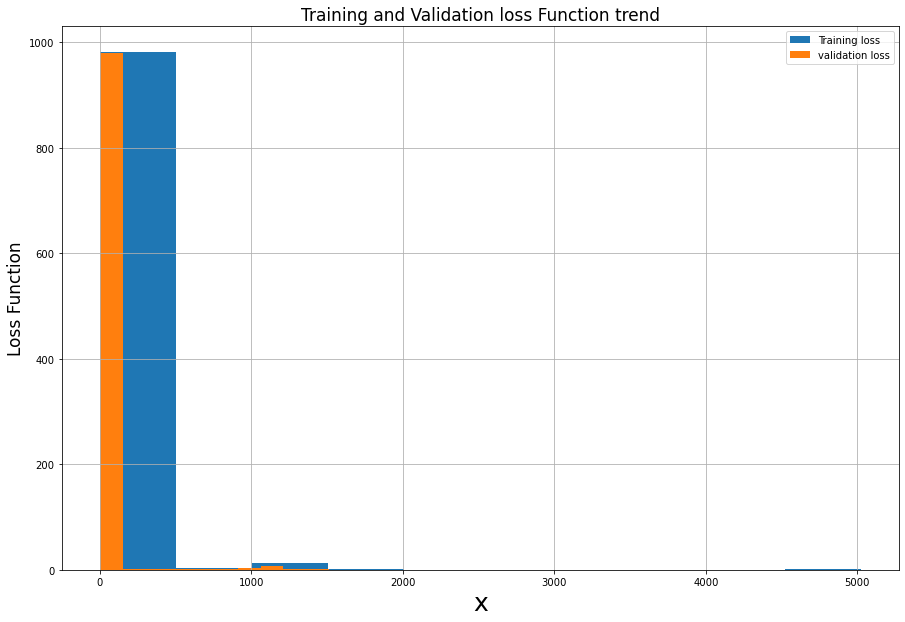

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
fig, ax = plt.subplots(figsize=(15, 10))
plt.hist(loss , label='Training loss')
plt.hist(val_loss , label='validation loss')
plt.grid('both')
plt.xlabel('x',fontsize=25)
plt.ylabel('Loss Function',fontsize=17)
plt.title('Training and Validation loss Function trend',fontsize=17)
plt.legend()
plt.show()
fig.savefig("Graphs/lossfunction.png")

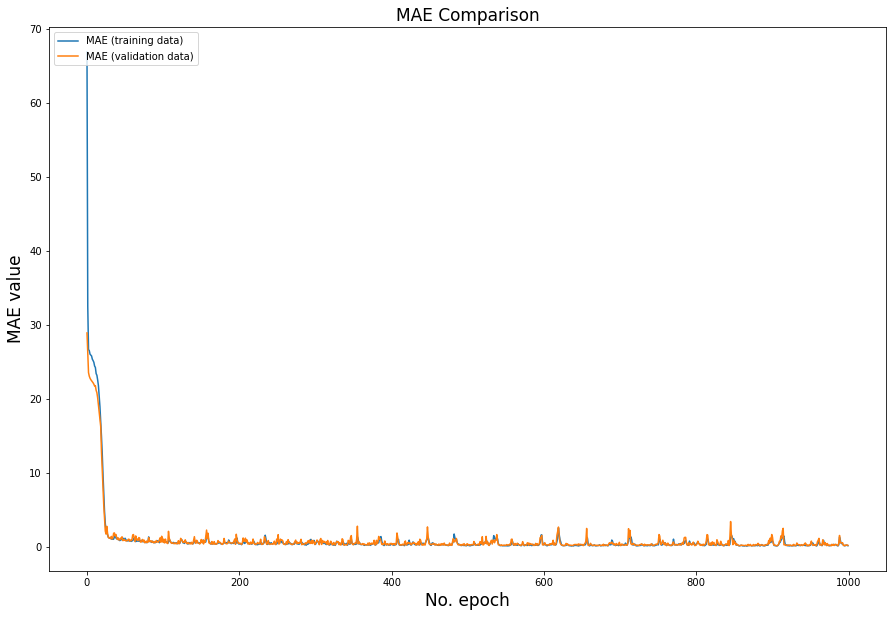

In [25]:
fig,ax = plt.subplots(figsize=(15,10))
plt.plot(history.history['mae'], label='MAE (training data)')
plt.plot(history.history['val_mae'], label='MAE (validation data)')
plt.title('MAE Comparison',fontsize=17)
plt.ylabel('MAE value',fontsize=17)
plt.xlabel('No. epoch',fontsize=17)
plt.legend(loc="upper left")
plt.show()
fig.savefig("Graphs/MAEcomparison.png")

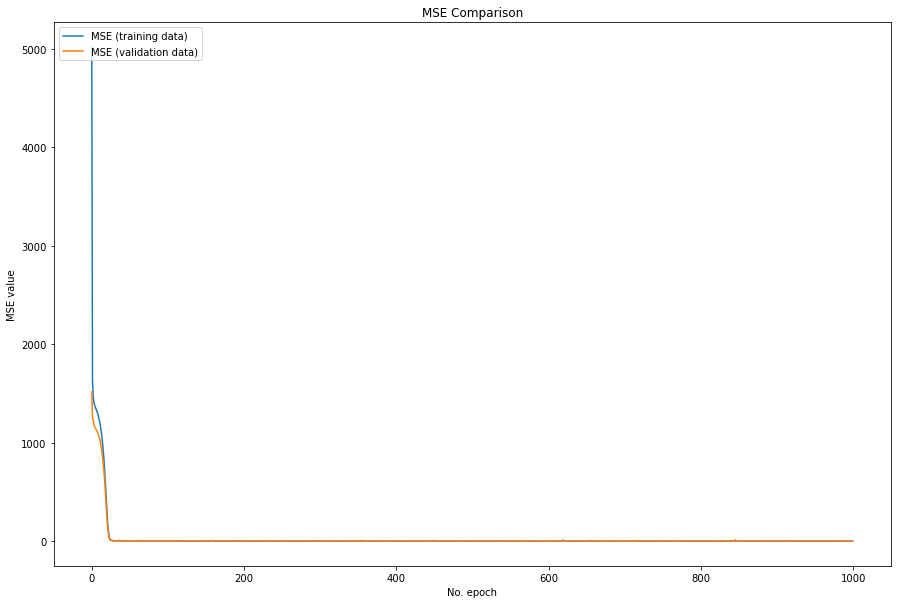

In [26]:
fig,ax = plt.subplots(figsize=(15,10))
plt.plot(history.history['mse'], label='MSE (training data)')
plt.plot(history.history['val_mse'], label='MSE (validation data)')
plt.title('MSE Comparison')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()
fig.savefig("Graphs/MSEcomparison.png")

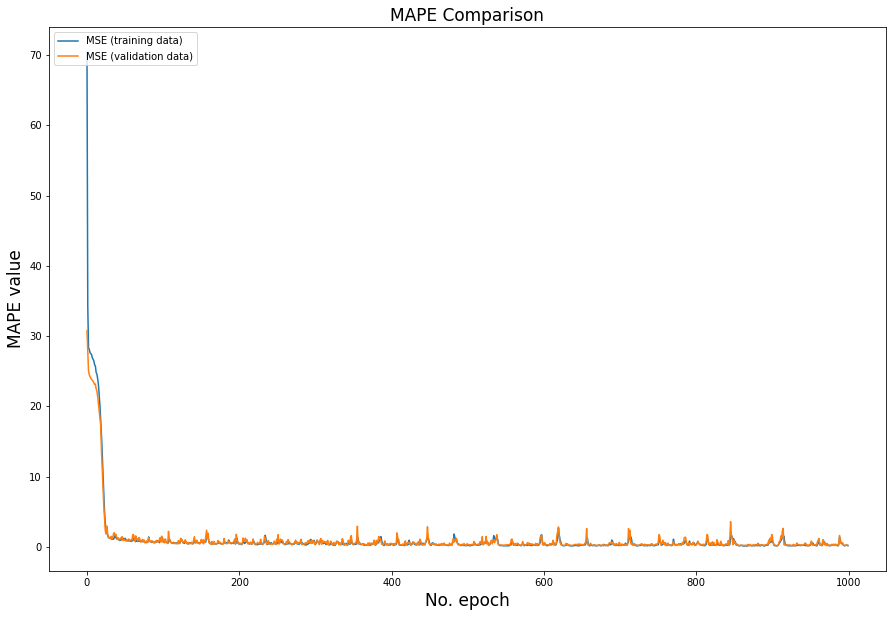

In [27]:
fig,ax = plt.subplots(figsize=(15,10))
plt.tight_layout
plt.plot(history.history['mape'], label='MSE (training data)')
plt.plot(history.history['val_mape'], label='MSE (validation data)')
plt.title('MAPE Comparison',fontsize=17)
plt.ylabel('MAPE value',fontsize=17)
plt.xlabel('No. epoch',fontsize=17)
plt.legend(loc="upper left")
plt.show()
fig.savefig("Graphs/MAPEcomparison.png")

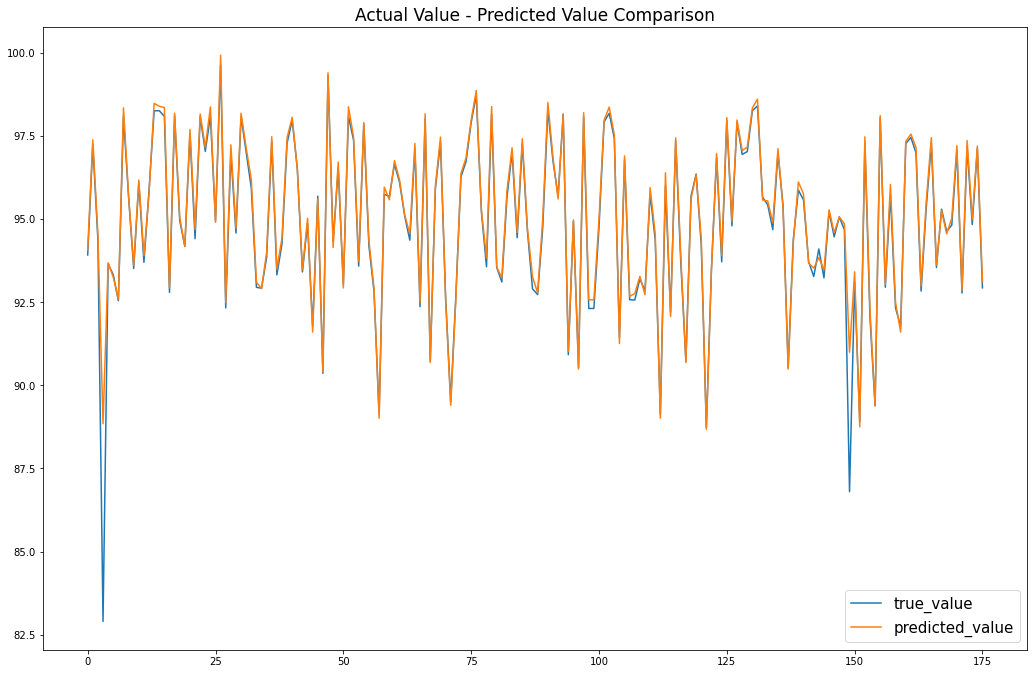

In [28]:
fig,ax = plt.subplots(figsize=(15,10))
true_value = (test_labels)
predicted_value = model.predict(test_features)
plt.plot(true_value)
plt.plot(predicted_value)
plt.legend(labels=['true_value','predicted_value'],loc='lower right',fontsize=15)
plt.title('Actual Value - Predicted Value Comparison',fontsize=17)
fig.tight_layout(pad=3.0)
fig.savefig("Graphs/predictioncomparison.png")

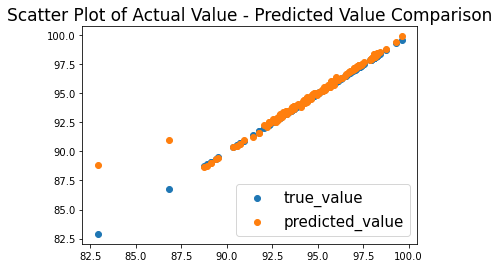

In [40]:

import matplotlib.pyplot as plt
import numpy as np

# x-coordinates for both the scatter plots

# the first scatter plot
y1 = true_value
plt.scatter(x, y1)

# the second scatter plot
y2 = predicted_value
plt.scatter(x,y2)
plt.legend(labels=['true_value','predicted_value'],loc='lower right',fontsize=15)
plt.title('Scatter Plot of Actual Value - Predicted Value Comparison',fontsize=17)
# displaying both plots
plt.show()

In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = input_data 
y = output
model2 = LinearRegression()
model2.fit(x, y)
model2 = LinearRegression().fit(x, y)
r_sq = model2.score(x, y)

TypeError: You are passing KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='Input'), name='Input', description="created by layer 'Input'"), an intermediate Keras symbolic input/output, to a TF API that does not allow registering custom dispatchers, such as `tf.cond`, `tf.function`, gradient tapes, or `tf.map_fn`. Keras Functional model construction only supports TF API calls that *do* support dispatching, such as `tf.math.add` or `tf.reshape`. Other APIs cannot be called directly on symbolic Kerasinputs/outputs. You can work around this limitation by putting the operation in a custom Keras layer `call` and calling that layer on this symbolic input/output.